<a href="https://colab.research.google.com/github/FelipeVitta/RandomForestCrossVal/blob/main/CrossValidation_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



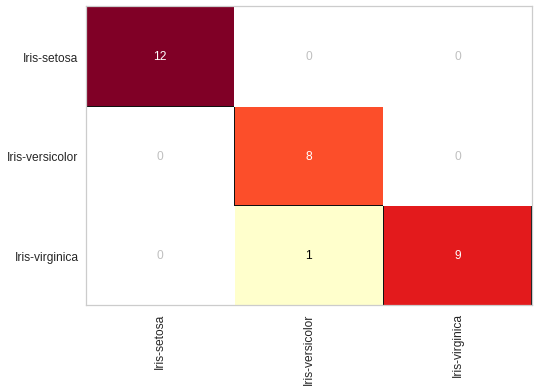

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE 
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score

dataset = pd.read_csv("/content/sample_data/Iris.csv")

inputs = dataset.drop('class',axis='columns')
target = dataset['class']

#imputando dados ausentes 
knn_imputer = KNNImputer(n_neighbors=2)
inputs = knn_imputer.fit_transform(inputs)

#balanceamento oversample
smt = SMOTE(random_state=1)
inputs, target = smt.fit_resample(inputs,target)

x_treino,x_teste,y_treino,y_teste = train_test_split(inputs, target, test_size = 0.2, random_state = 23);

model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state = 100);
model.fit(x_treino,y_treino)

scores = cross_val_score(model, inputs, target, cv=10, scoring='accuracy')

#previsao do modelo com as entradas de teste

previsao = model.predict(x_teste)

#comparando as saidas de teste com os testes da previsao

confusion_matrix(y_teste, previsao)

cm = ConfusionMatrix(model)
cm.fit(x_treino, y_treino)
cm.score(x_teste,y_teste)

#gerando as metricas do modelo

print(classification_report(y_teste,previsao))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
scores

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.86666667, 1.        , 1.        , 1.        ])

In [ ]:
print(sum(scores)/float(len(scores)))

0.9600000000000002
